In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
heart_disease = pd.read_csv('/content/Heart Disease.csv')
heart_disease.head(10)

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
heart_disease.shape

(4240, 16)

In [ ]:
heart_disease.isnull().sum()

,0
gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
heart_disease = heart_disease.drop(['education'], axis=1)
heart_disease.shape

(4240, 15)

In [ ]:
print("Number of rows with null values in glucose column: ", heart_disease['glucose'].isnull().sum())
print("Number of rows with null values in glucose column: ", heart_disease['glucose'].notnull().sum())

heart_disease.isnull().sum()

# heart_disease_clean.shape

Number of rows with null values in glucose column:  388
Number of rows with null values in glucose column:  3852


,0
gender,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


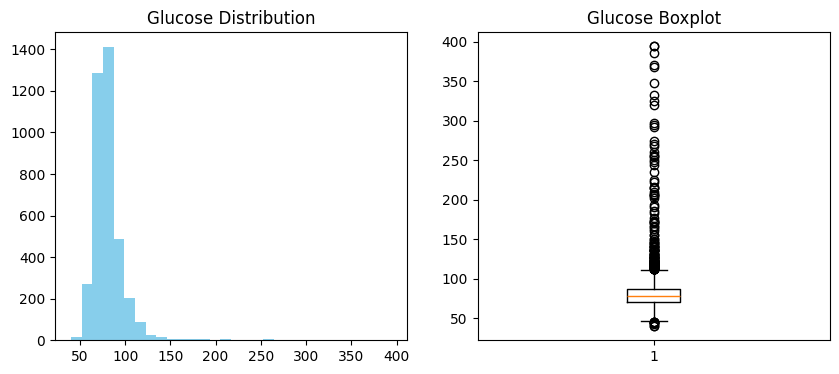

In [ ]:
# Plot glucose distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(heart_disease['glucose'].dropna(), bins=30, color='skyblue')
plt.title("Glucose Distribution")

plt.subplot(1, 2, 2)
plt.boxplot(heart_disease['glucose'].dropna())
plt.title("Glucose Boxplot")
plt.show()

In [ ]:
heart_disease['glucose'] = heart_disease.groupby('diabetes')['glucose'].transform(
    lambda x: x.fillna(x.median())
)

heart_disease.isnull().sum()

,0
gender,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [ ]:
from sklearn.impute import SimpleImputer

imputers = {
    'cigsPerDay' : SimpleImputer(strategy = 'median'),
    'totChol' : SimpleImputer(strategy = 'median'),
    'BMI' : SimpleImputer(strategy = 'median'),
    'BPMeds' : SimpleImputer(strategy = 'most_frequent')
}

for k,v in imputers.items():
    heart_disease[k] = v.fit_transform(heart_disease[[k]]).flatten()

heart_disease.dropna(subset=['heartRate'], inplace=True)

heart_disease.isnull().sum()


,0
gender,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [ ]:
heart_disease.sample(10)

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
2474,Female,54,0,0.0,0.0,0,1,0,239.0,142.5,83.5,30.47,83.0,84.0,0
1753,Female,43,1,5.0,0.0,0,0,0,250.0,110.0,70.0,21.14,64.0,85.0,0
3284,Female,39,1,10.0,0.0,0,0,0,194.0,112.5,77.5,21.51,67.0,84.0,0
2085,Female,46,1,20.0,0.0,0,0,0,185.0,137.0,90.0,25.20,82.0,78.0,0
541,Female,49,0,0.0,1.0,0,1,0,300.0,131.0,88.0,26.85,70.0,73.0,1
1564,Male,54,0,0.0,0.0,0,0,0,179.0,103.0,73.0,21.03,60.0,84.0,0
1334,Male,44,1,20.0,0.0,0,0,0,214.0,128.0,94.0,23.51,72.0,66.0,0
2803,Male,62,0,0.0,0.0,0,1,0,191.0,156.0,91.0,31.20,68.0,75.0,1
140,Female,55,0,0.0,0.0,0,0,0,286.0,138.0,82.0,24.27,80.0,90.0,1
1566,Male,58,1,30.0,0.0,0,0,0,200.0,144.0,90.0,24.90,75.0,76.0,0


CHECK FOR OUTLIERS. 3 methods


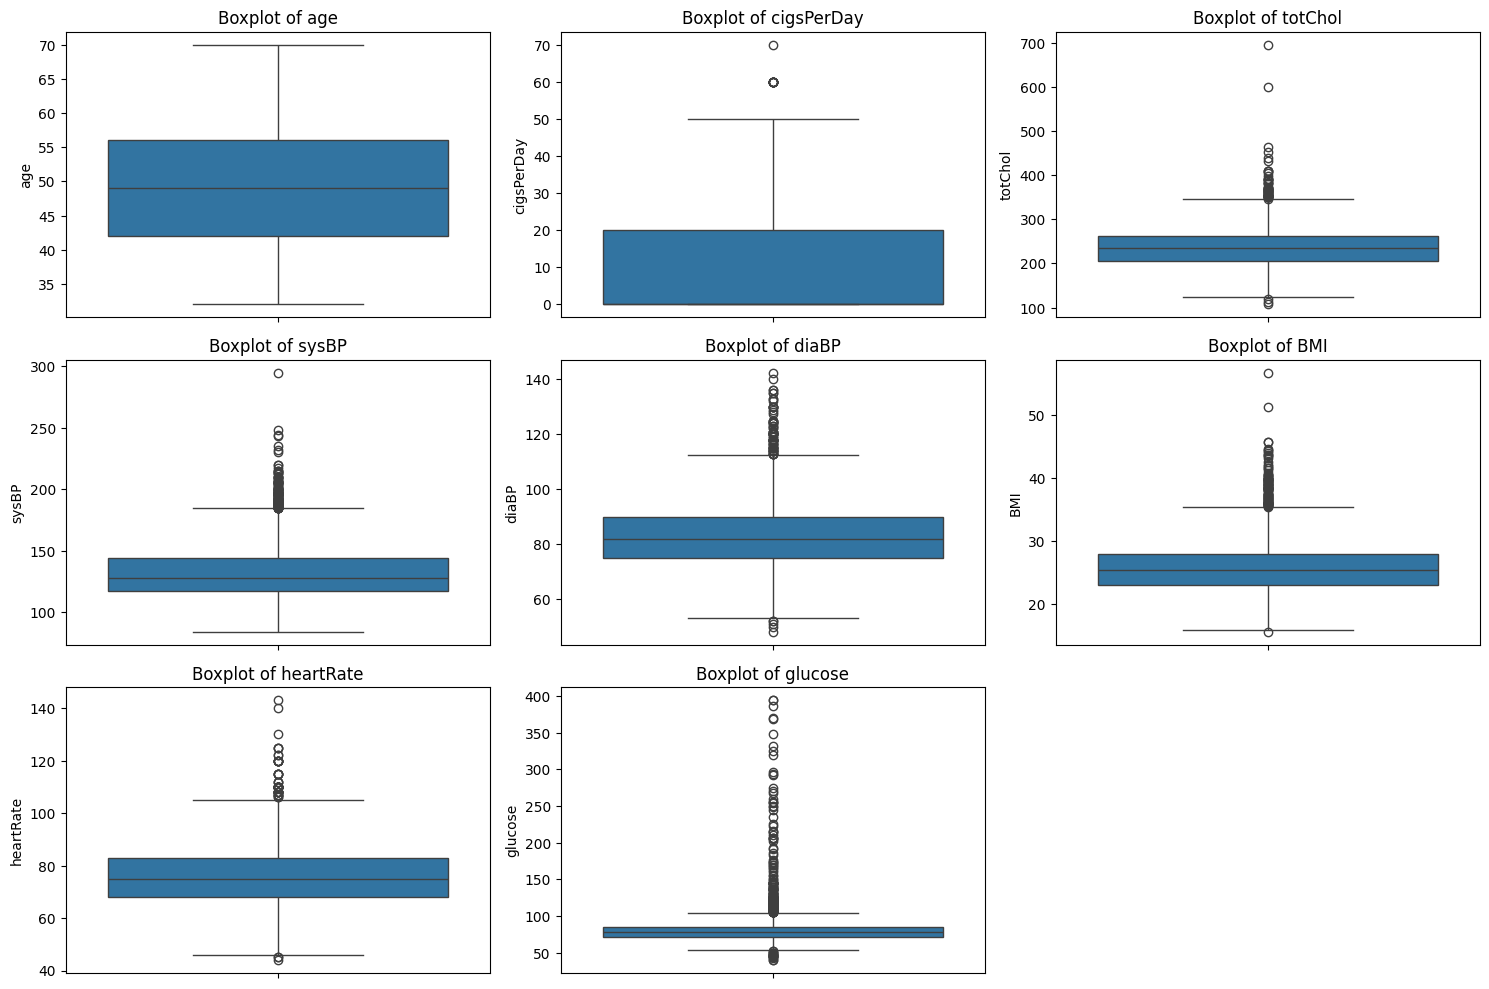

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=heart_disease[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()




In [ ]:
from scipy.stats import zscore

z_scores = heart_disease[numeric_cols].apply(zscore)
outlier_counts = (abs(z_scores) > 3).sum()

print("Outlier count using Z-score (|z| > 3):")
print(outlier_counts)


Outlier count using Z-score (|z| > 3):
age            0
cigsPerDay    21
totChol       25
sysBP         48
diaBP         41
BMI           60
heartRate     23
glucose       50
dtype: int64


In [ ]:
Q1 = heart_disease[numeric_cols].quantile(0.25)
Q3 = heart_disease[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (heart_disease[numeric_cols] < (Q1 - 1.5 * IQR)) | (heart_disease[numeric_cols] > (Q3 + 1.5 * IQR))
outlier_counts_iqr = outlier_mask.sum()

print("\nOutlier count using IQR method:")
print(outlier_counts_iqr)



Outlier count using IQR method:
age             0
cigsPerDay     12
totChol        57
sysBP         126
diaBP          77
BMI            98
heartRate      76
glucose       266
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# Encode 'gender' to 0/1 (binary label encoding)

# # Count missing values per column
# missing_values = heart_disease.isna().sum()
# print(missing_values)

heart_disease['gender'] = heart_disease['gender'].map({'Male': 1, 'Female': 0})


# Separate features and label
X = heart_disease.drop('Heart Disease (in next 10 years)', axis=1)
y = heart_disease['Heart Disease (in next 10 years)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



robust_cols = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
minmax_cols = ['age']
categorical_cols = ['gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), robust_cols),
        ('minmax', MinMaxScaler(), minmax_cols),
        ('category', 'passthrough', categorical_cols)
    ]
)


preprocessor.fit(X_train)

X_train_scaled = preprocessor.transform(X_train)
X_test_scaled = preprocessor.transform(X_test)



print(X_train.shape)
print(X_test.shape)

(2967, 14)
(1272, 14)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(X_train_scaled, y_train)

print(f"Training Accuracy: {model.score(X_train_scaled, y_train):.2f}")
print(f"Test Accuracy: {model.score(X_test_scaled, y_test):.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.86


In [ ]:
# Balanced parameters
tuned_rf = RandomForestClassifier(
    max_depth=8,
    min_samples_split=20,
    n_estimators=100,
    random_state=1
)
tuned_rf.fit(X_train_scaled, y_train)

print(f"Tuned Train Accuracy: {tuned_rf.score(X_train_scaled, y_train):.2f}")
print(f"Tuned Test Accuracy: {tuned_rf.score(X_test_scaled, y_test):.2f}")

Tuned Train Accuracy: 0.86
Tuned Test Accuracy: 0.86


<Figure size 800x600 with 0 Axes>

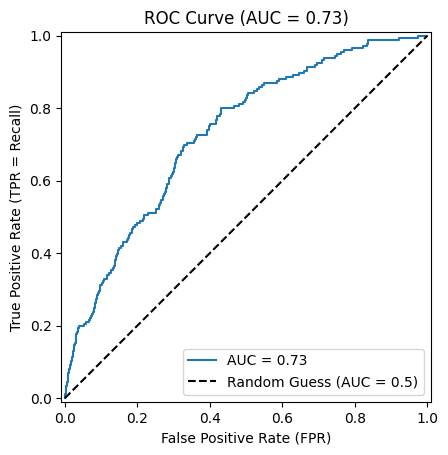

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Get predicted probabilities for the positive class (heart disease)
y_proba = tuned_rf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")  # Diagonal line
plt.title(f"ROC Curve (AUC = {auc:.2f})")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR = Recall)")
plt.legend()
plt.show()

In [ ]:
counts = heart_disease['Heart Disease (in next 10 years)'].value_counts()

# Display results
print(counts)

Heart Disease (in next 10 years)
0    3596
1     643
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get model predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# Calculate metrics
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")

Precision: 0.820
Recall:    0.862
F1-Score:  0.812
